In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error

In [100]:
df = pd.read_csv('insurance.csv')

In [101]:
df.info

<bound method DataFrame.info of       Unnamed: 0  age     sex     bmi  children smoker     region      charges
0              0   19  female  27.900         0    yes  southwest  16884.92400
1              1   18    male  33.770         1     no  southeast   1725.55230
2              2   28    male  33.000         3     no  southeast   4449.46200
3              3   33    male  22.705         0     no  northwest  21984.47061
4              4   32    male  28.880         0     no  northwest   3866.85520
...          ...  ...     ...     ...       ...    ...        ...          ...
1333        1333   50    male  30.970         3     no  northwest  10600.54830
1334        1334   18  female  31.920         0     no  northeast   2205.98080
1335        1335   18  female  36.850         0     no  southeast   1629.83350
1336        1336   21  female  25.800         0     no  southwest   2007.94500
1337        1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 8 colu

In [99]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# 3:southwest, 2:southeast, 1:northwest, 0:northeast
df, df.shape

(      age  sex     bmi  children  smoker  region      charges
 0      19    0  27.900         0       1       3  16884.92400
 1      18    1  33.770         1       0       2   1725.55230
 2      28    1  33.000         3       0       2   4449.46200
 3      33    1  22.705         0       0       1  21984.47061
 4      32    1  28.880         0       0       1   3866.85520
 ...   ...  ...     ...       ...     ...     ...          ...
 1333   50    1  30.970         3       0       1  10600.54830
 1334   18    0  31.920         0       0       0   2205.98080
 1335   18    0  36.850         0       0       2   1629.83350
 1336   21    0  25.800         0       0       3   2007.94500
 1337   61    0  29.070         0       1       1  29141.36030
 
 [1338 rows x 7 columns],
 (1338, 7))

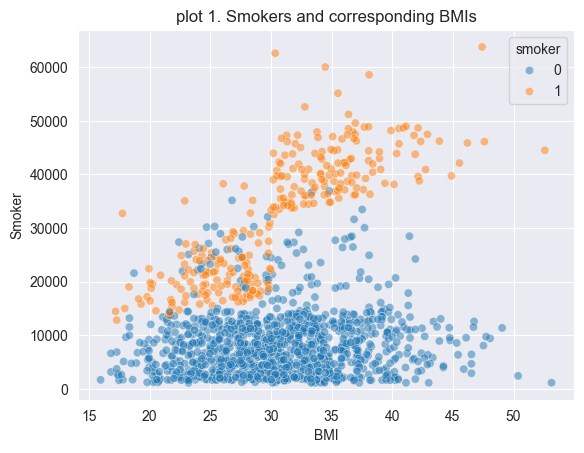

In [56]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Smoker')
plt.title('plot 1. Smokers and corresponding BMIs')
plt.show()

In [57]:
X = df[['age', 'bmi', 'smoker', 'region', 'children']]
X_train, X_test, y_train, y_test = train_test_split(X, df['charges'], random_state=42, test_size=0.3)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

weights = model.coef_
bias = model.intercept_

weights , bias

(array([  261.57526754,   344.64669751, 23627.06251225,  -328.35187084,
          425.16370304]),
 np.float64(-12308.689430378472))

In [59]:
linequ= f'y = {weights[0]:.2f} x_age + {weights[1]:.2f} x_bmi + {weights[2]:.2f} x_smoker + {weights[3]:.2f} x_region + {weights[4]:.2f} x_children + {bias:.2f}'
print(linequ)

y = 261.58 x_age + 344.65 x_bmi + 23627.06 x_smoker + -328.35 x_region + 425.16 x_children + -12308.69


In [60]:
y_pred_train = model.predict(X_train)

In [61]:

r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'RMSE_train: {rmse_train:.2f}, R2 SCORE_train: {r2_train:.2f}')

RMSE_train: 6144.44, R2 SCORE_train: 0.74


In [62]:
y_pred = model.predict(X_test)

In [63]:
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse_test: .2f}, R2 SCORE: {r2_test:.2f}')

RMSE:  5810.72, R2 SCORE: 0.77


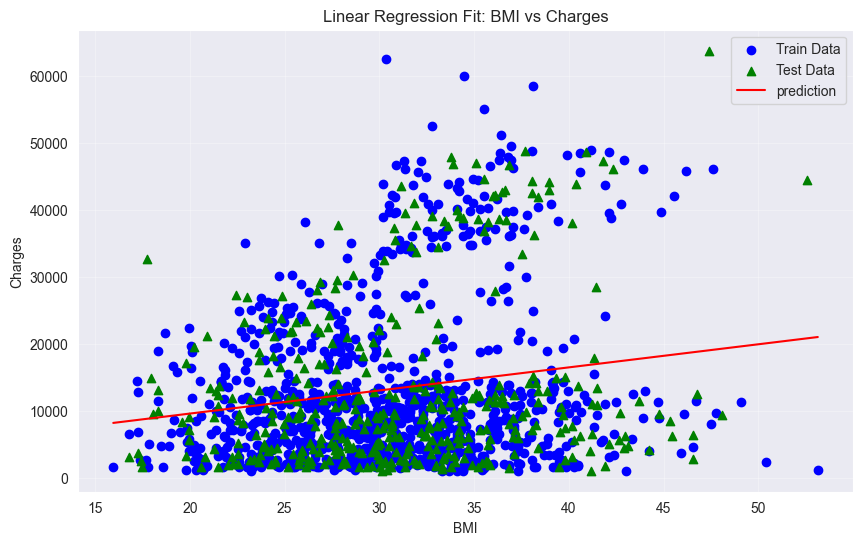

In [64]:
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 100)

# Fix other features at their mean
X_plot = pd.DataFrame({
    'age': df['age'].mean(),
    'bmi': bmi_range,
    'smoker': df['smoker'].mean(),
    'region': df['region'].mean(),
    'children': df['children'].mean()
})

plt.figure(figsize=(10,6))
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data')
plt.scatter(X_test['bmi'], y_test, color='green', marker='^', label='Test Data')
plt.plot(bmi_range, model.predict(X_plot), color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Linear Regression Fit: BMI vs Charges')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [65]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [66]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

weights_poly = model.coef_
bias_poly = model.intercept_

weights_poly, bias_poly

(array([ 0.00000000e+00, -1.27995065e+02,  5.07562209e+02, -1.00020137e+04,
        -1.71794370e+02,  6.61354580e+02,  3.99451120e+00,  1.54546922e+00,
        -1.36423154e+00,  2.04731521e+01,  3.40698966e-01, -7.84080549e+00,
         1.43096164e+03, -4.32535055e+01,  1.87890359e+01, -1.00020137e+04,
         3.93876674e+02, -4.41967049e+02,  1.46529621e+02, -1.89684505e+02,
        -7.26468223e+01]),
 np.float64(-3550.151984298005))

In [67]:
feature_names = poly.get_feature_names_out(X_train.columns)
feature_names

array(['1', 'age', 'bmi', 'smoker', 'region', 'children', 'age^2',
       'age bmi', 'age smoker', 'age region', 'age children', 'bmi^2',
       'bmi smoker', 'bmi region', 'bmi children', 'smoker^2',
       'smoker region', 'smoker children', 'region^2', 'region children',
       'children^2'], dtype=object)

In [68]:
# 1, x1...x5/x1^2,x1x2,...x1x5,x2^2,x2x3...,x3^2,........x5^2
equ= f' y =  {weights_poly[1]: .2f} x1 + {weights_poly[2]: .2f} x2 + {weights_poly[3]: .2f} x3 + {weights_poly[4]: .2f} x4 + {weights_poly[5]: .2f} x5 + {weights_poly[6]: .2f} x1^2 + {weights_poly[7]: .2f} x1x2 + {weights_poly[8]: .2f} x1x3+ {weights_poly[9]: .2f} x1x4+ {weights_poly[10]: .2f} x1x5 + {weights_poly[11]: .2f} x2^2 + {weights_poly[12]: .2f} x2x3 + {weights_poly[13]: .2f} x2x4 + {weights_poly[14]: .2f} x2x5 + {weights_poly[15]: .2f} x3^2 + {weights_poly[16]: .2f} x3x4 + {weights_poly[17]: .2f} x3x5+ {weights_poly[18]: .2f} x4^2 + {weights_poly[19]: .2f} x4x5 + {weights_poly[20]: .2f} x5^2 + {bias_poly:.2f}'
print(equ)

 y =  -128.00 x1 +  507.56 x2 + -10002.01 x3 + -171.79 x4 +  661.35 x5 +  3.99 x1^2 +  1.55 x1x2 + -1.36 x1x3+  20.47 x1x4+  0.34 x1x5 + -7.84 x2^2 +  1430.96 x2x3 + -43.25 x2x4 +  18.79 x2x5 + -10002.01 x3^2 +  393.88 x3x4 + -441.97 x3x5+  146.53 x4^2 + -189.68 x4x5 + -72.65 x5^2 + -3550.15


In [84]:
y_test_pred= model.predict(X_test_poly)
r2_poly_test = r2_score(y_test, y_test_pred)
rmse_poly_test = root_mean_squared_error(y_test, y_test_pred)
print('Test Evaluations:')
print(f'RMSE: {rmse_poly_test: .2f}, R2 SCORE: {r2_poly_test:.2f}')

y_poly_pred_train = model.predict(X_train_poly)
r2_poly_train = r2_score(y_train, y_poly_pred_train)
rmse_poly_train = root_mean_squared_error(y_train, y_poly_pred_train)
print('Train Evaluations:')
print(f'RMSE: {rmse_poly_train: .2f}, R2 SCORE: {r2_poly_train:.2f}')

Test Evaluations:
RMSE:  4464.39, R2 SCORE: 0.86
Train Evaluations:
RMSE:  4878.43, R2 SCORE: 0.84


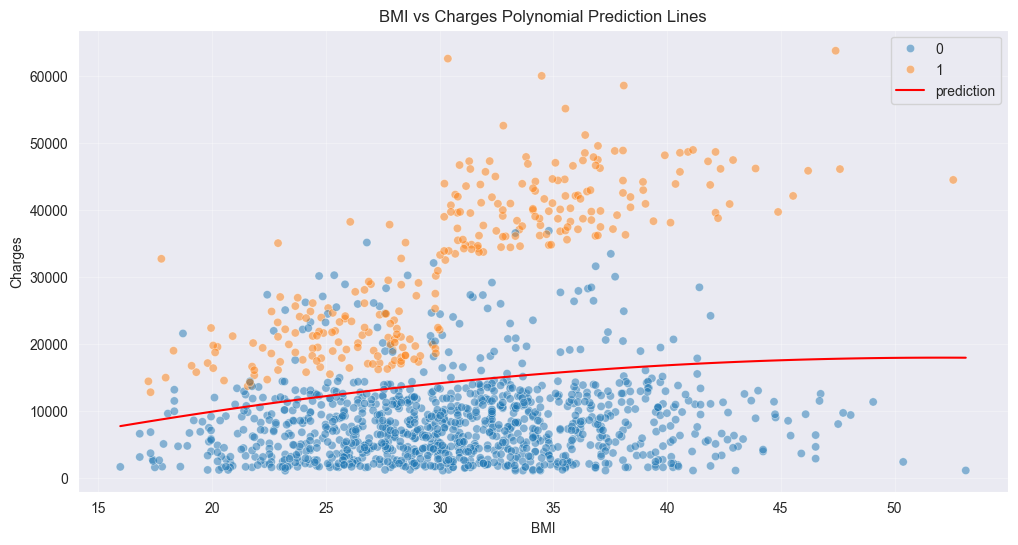

In [85]:
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 100)

# Fix other features at their mean
X_plot = pd.DataFrame({
    'age': df['age'].mean(),
    'bmi': bmi_range,
    'smoker': df['smoker'].mean(),
    'region': df['region'].mean(),
    'children': df['children'].mean()
})

X_plot_poly = poly.transform(X_plot)
y_poly_pred = model.predict(X_plot_poly)

# --- Plot scatter + prediction lines ---
plt.figure(figsize=(12,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.5)
plt.plot( bmi_range , y_poly_pred , color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges Polynomial Prediction Lines')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [86]:
overfit_df = pd.DataFrame({
    "linear_train": [rmse_train , r2_train],
    "linear_test": [rmse_test, r2_test],
    "poly_train": [rmse_poly_train, r2_poly_train],
    "poly_test": [rmse_poly_test, r2_poly_test]
}, index=["RMSE", "R2"])

overfit_df

,linear_train,linear_test,poly_train,poly_test
RMSE,6144.442608,5810.720833,4878.434332,4464.387345
R2,0.742237,0.769721,0.837514,0.864069


No overfitting occured:
better performance in test case
based on the plot above, there are no signs of adaption to noises and learning all cases
R2 Score in Test and Train are close

Better performance with polynomial features
=> improved rmse and R2 Score

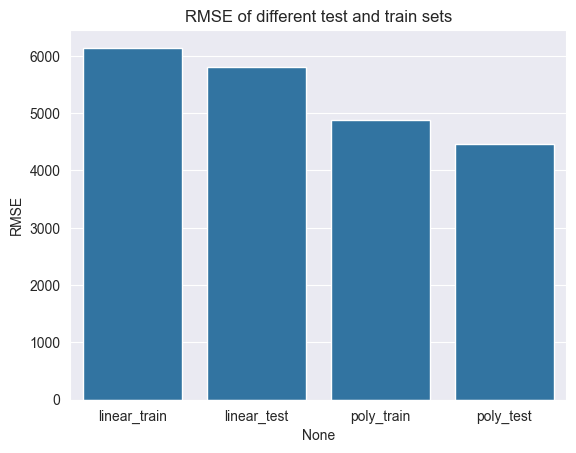

In [87]:
sns.barplot(x=overfit_df.columns , y=overfit_df.loc['RMSE'])
plt.title('RMSE of different test and train sets')
plt.show()

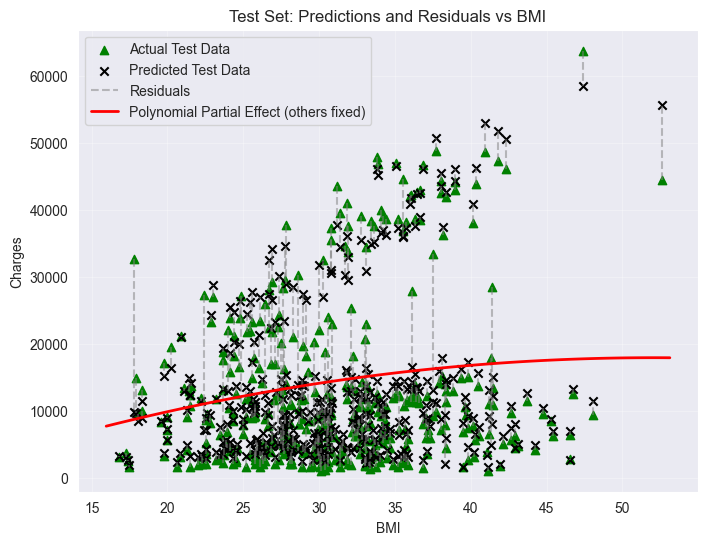

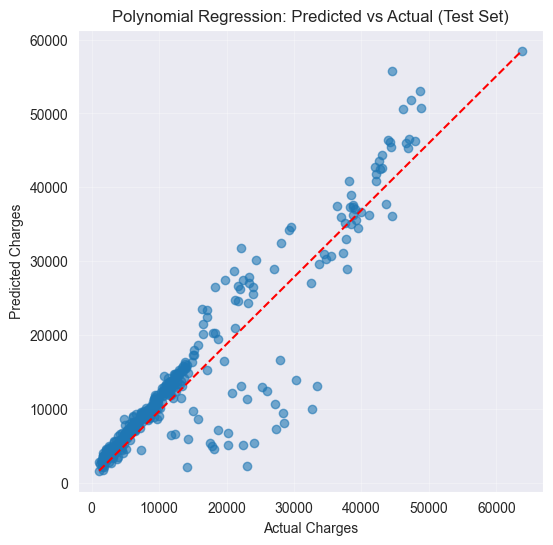

In [96]:
plt.figure(figsize=(8,6))

# Actual vs predicted on BMI axis
plt.scatter(X_test['bmi'], y_test, color='green', marker='^', label='Actual Test Data')
plt.scatter(X_test['bmi'], y_test_pred, color='black', marker='x', label='Predicted Test Data')

# Residuals
plt.vlines(
    X_test['bmi'],
    y_test,
    y_test_pred,
    color='gray',
    linestyle='--',
    alpha=0.5,
    label='Residuals'
)

# Partial dependence curve
plt.plot(
    bmi_range,
    y_poly_pred,
    color='red',
    linewidth=2,
    label='Polynomial Partial Effect (others fixed)'
)

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Test Set: Predictions and Residuals vs BMI')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test_pred.min(), y_test_pred.max()],
    'r--'
)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression: Predicted vs Actual (Test Set)')
plt.grid(alpha=0.3)
plt.show()


Because of the graph being plotted regarding bmi the line is inaccurate and only demonstrates the changes based on the bmi changes, However the model's prediction is based on 5 features.